HW1

1. Download the "Sunny Lake" image.

2. Obtain the gray scale image, l by taking the average values of R, G, B channels.

In [69]:
from image import *
from PIL import Image
config.read('config.ini')
img_url = config['MAIN']['image']

folder_content = config['MAIN']['folder']
folder_out = config['MAIN']['out']

img_name = os.path.basename(img_url)
createFolders((folder_content, folder_out))
downloadImage(img_url, folder_content, img_name)

asset_org = "{}/{}".format(folder_content, img_name)
asset_out = "{}/{}".format(folder_out, img_name)

In [70]:
img = Image.open('SunnyLake.bmp').convert('LA')
img.save('l.png')

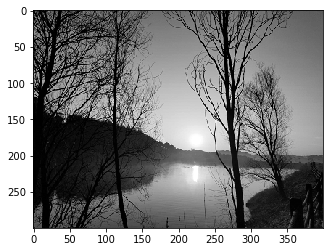

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = mpimg.imread('l.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

3. Obtain the histogram, h, of the gray scale image, l.

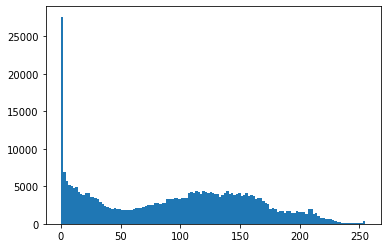

In [72]:
from skimage import io
import os
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('l.png')
ax = plt.hist(image.ravel(), bins = 127)
plt.savefig('h.png')
plt.show()

4.  Inspect h and propose a threshold value, T, to segment the image into two parts and hence obtain a binary image, B:
a. Pixels with intensity values above T.
b. Pixels with intensity values below T

T =  55
T mean =  95.19254166666667


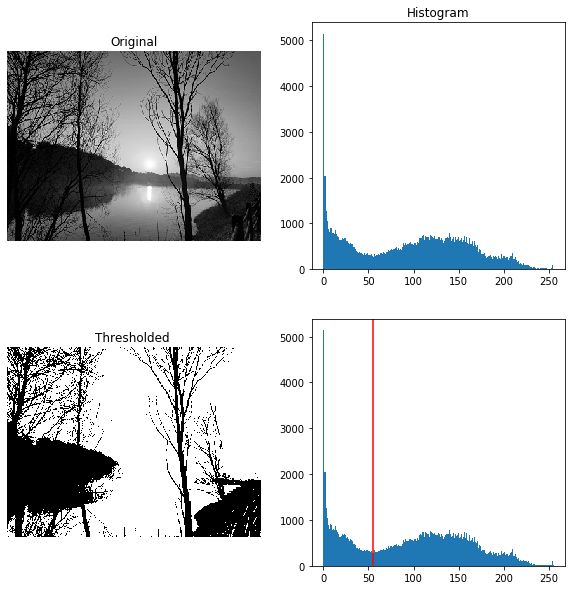

In [73]:
from skimage.filters import threshold_minimum
from skimage.filters import threshold_mean

image = cv2.imread('l.png',0)

thresh_mean = threshold_mean(image)
thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded ')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
    
print('T = ',thresh_min)
print('T mean = ', thresh_mean)
plt.show()


5. Present the output image B.

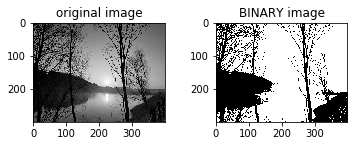

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('l.png',0)
ret,thresh = cv2.threshold(img,55,255,cv2.THRESH_BINARY)


titles = ['original image','BINARY image']
images = [img, thresh]

for i in range(2):
    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])

plt.show()

6. Add the following zero mean Gaussian noises, separately to red, green and blue channels of
256x256 colored "Sunny Lake" image, with standard deviations of 1, 5, 10, 20. Show resulting images.

In [106]:
from image import *
# config.read('config.ini')
# img_url = config['MAIN']['image']
# folder_content = config['MAIN']['folder']
# folder_out = config['MAIN']['out']

# img_name = os.path.basename(img_url)
# createFolders((folder_content, folder_out))
# downloadImage(img_url, folder_content, img_name)

# asset_org = "{}/{}".format(folder_content, img_name)
# asset_out = "{}/{}".format(folder_out, img_name)
img = Image(filename=asset_org, format=os.path.splitext(img_name)[1][1:])
array = img2array(img, color="RGB")
img_height, img_width = img.size

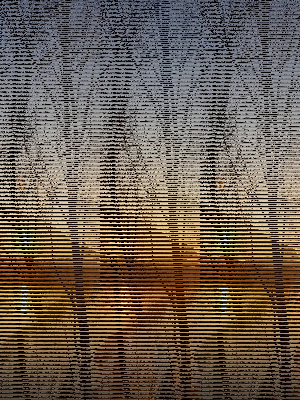

In [107]:
standart_dev = 1
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
img_array_the = Image.from_array(x)
img_array_the

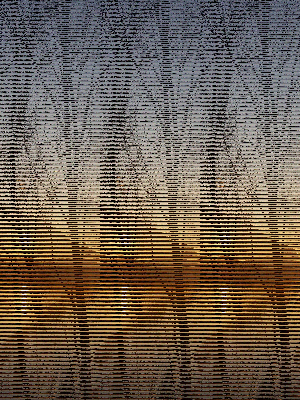

In [108]:
standart_dev = 5
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
img_array_the = Image.from_array(x)
img_array_the

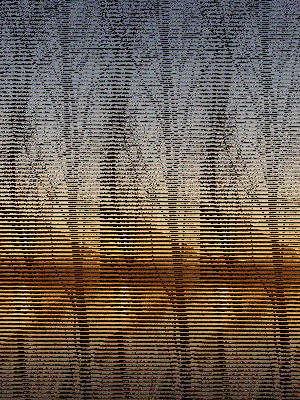

In [109]:
standart_dev = 10
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
img_array_the = Image.from_array(x)
img_array_the

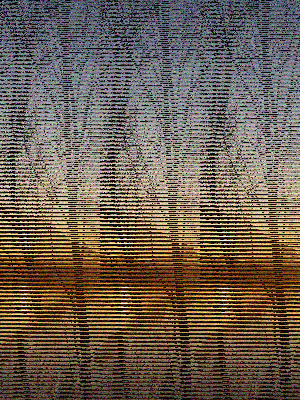

In [110]:
standart_dev = 20
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
img_array_the = Image.from_array(x)
img_array_the

7. Obtain gray scale images, I_1, I_5, I_10 and I_20 by taking the average values of R, G, B channels
corresponding to different noise levels.

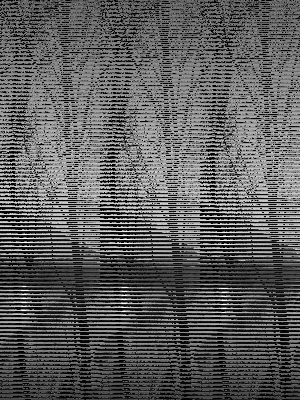

In [111]:
standart_dev = 1 # I_1
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
x = np.mean(x, axis=2, keepdims=1, dtype=np.uint16).astype(np.uint8)

img_array_the = Image.from_array(x)
img_array_the

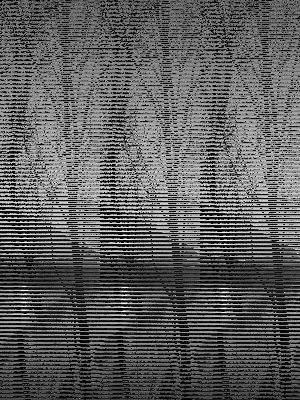

In [112]:
standart_dev = 5 # I_5
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
x = np.mean(x, axis=2, keepdims=1, dtype=np.uint16).astype(np.uint8)

img_array_the = Image.from_array(x)
img_array_the

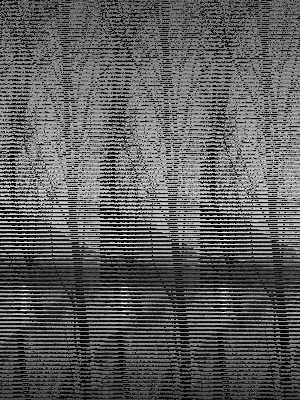

In [113]:
standart_dev = 10 # I_10
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
x = np.mean(x, axis=2, keepdims=1, dtype=np.uint16).astype(np.uint8)

img_array_the = Image.from_array(x)
img_array_the

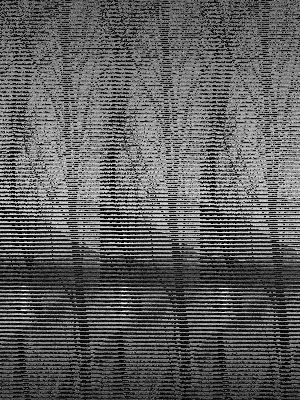

In [114]:
standart_dev = 20 # I_20
zero_mean = 0
s = np.random.normal(zero_mean, standart_dev, size=(300, 400, 3)).astype(np.int8)
x = np.add(array, s, dtype=np.int16)
x[x > 255] = 255
x[x < 0] = 0
x = x.astype(np.uint8)
x = np.mean(x, axis=2, keepdims=1, dtype=np.uint16).astype(np.uint8)

img_array_the = Image.from_array(x)
img_array_the

8. Filter these images using low-pass filters with kernels presented on pages 9 and 12 of “filter.pdf”
document.

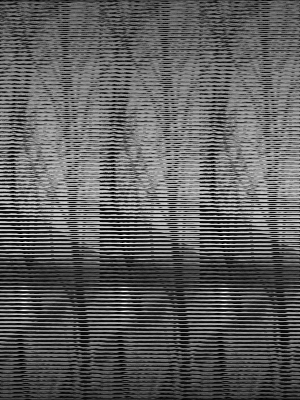

In [132]:
from scipy.signal import convolve2d as convolve
kernel_array = np.ones((3, 3)) * 1 / 9
height, width = x.shape
x = np.resize(x,(height, width))
filter_img = convolve(x, kernel_array,'same');
filter_img = filter_img.round().astype(np.uint8)
img_array_the = Image.from_array(filter_img)
img_array_the

9. Filter images in 7) using high-pass filters with kernels presented on pages 17 and 19 of “filter.pdf”
document.

In [133]:
# I apply simple and very narrow high-pass filter via kernel_array

kernel_array = np.array([  
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]])

In [134]:
kernel_array = np.array([
    [0.17, 0.67,  0.17],
    [0.67, -3.33, 0.67],
    [0.17, 0.67,  0.17]])

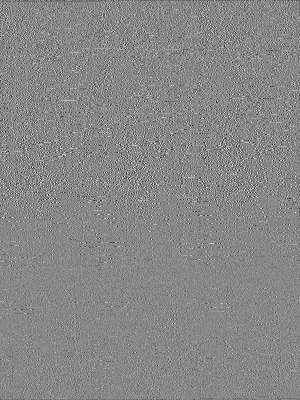

In [135]:
filter_img = conv2(x, kernel_array,'same');
filter_img = np.interp(filter_img, (filter_img.min(), filter_img.max()), (0, 255)).round().astype(np.uint8)
img_array_the = Image.from_array(filter_img)
img_array_the

10. Inspect Figure-1. Comment on the type of noise and propose a method to de-noise the image.
Implement your method and present the de-noised image.

There are 3 types of impulse noises. Salt noise, Pepper noise, Salt and Pepper noise. Salt and Pepper noise is added to an image by addition 
of both random bright(with 255 pixel value) and random dark(with 0 pixel value) all over the image. So, Figure-1's noise is salt and pepper
noise. Median Filtering is good at eliminating salt and pepper noise. So, I apply median filter to Figure-1.

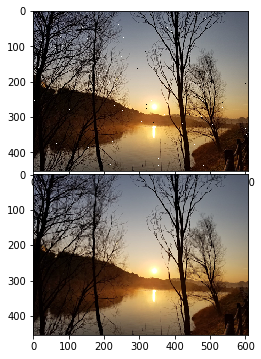

In [137]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Figure_1.png')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb


med = cv2.medianBlur(img, 3)

b,g,r = cv2.split(med)        # get b,g,r
rgb = cv2.merge([r,g,b])     # switch it to rgb

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)

plt.subplot(143)
plt.imshow(med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb)
plt.show()